In [2]:
import numpy as np
import scipy as sp

from skimage import io
from matplotlib import pyplot as plt
from matplotlib import style
from matplotlib import rcParams

In [12]:
def make_blocks(a, blocksize, keep_as_view=False):
    M,N = a.shape
    b0, b1 = blocksize
    if keep_as_view==0:
        return a.reshape(M//b0,b0,N//b1,b1).swapaxes(1,2).reshape(-1,b0,b1)
    else:
        return a.reshape(M//b0,b0,N//b1,b1).swapaxes(1,2)

# def backtracking(x, f, grad, rho=0.5, beta=0.8):
#     grad_x = np.array(grad(x.tolist()), dtype=np.float64)
#     fx = np.array(f(x.tolist()), dtype=np.float64)

#     step_size = 1.0
#     while f((x-step_size*grad_x).tolist()) >= (fx-rho*step_size*np.linalg.norm(grad_x,2)**2):
#         step_size *= beta

#     return step_size

def grad_descent(x_init, A, b, tol=1e-6, max_iterations=100):

    x = x_init
    for iter in range(max_iterations):
        grad_x = quad_grad(x,A,b)
        # step_size = exact_line_search(x,grad_x,hess)
        step_size = 0.1

        x -= step_size*grad_x
        if np.linalg.norm(grad_x,2) <= tol:
            break

    return iter+1, x

def quad_grad(x,A,b):
    return A.dot(x) - b

def quad_smoothing(x,delta=1):
    
    N = len(x)
    D = sp.linalg.toeplitz(np.hstack(([-1],np.zeros(N-2))),np.hstack(([-1,1],np.zeros(N-2))))

    A = np.eye(N) + delta*np.matmul(D.T,D)

    tol = 1e-6
    max_iterations = 10000
    x_init = np.zeros(N)
    num_iter, x_gd = grad_descent(x_init, A, x, tol, max_iterations)

    return x_gd

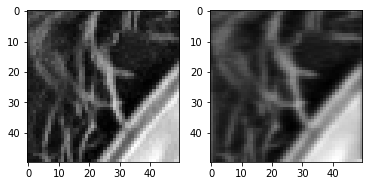

In [27]:
image = io.imread('images/lena.tif', 0)
image = image[200:250,200:250]
m,n = image.shape

smooth_image = quad_smoothing(image.flatten(),1)
smooth_image = smooth_image.reshape(m,n)

fig, plts = plt.subplots(1,2)
plts[0].imshow(image, cmap='gray')
plts[1].imshow(smooth_image, cmap='gray')
plt.show()